## Importing the required libraries

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Take a look at Dataset
'''
Let's take a look at our dataset. we're going to:

- load the dataset
- understand the features
- check for missing values ...
- ... and outliers
'''

## Read csv file (dataset ->CC GENERAL)

In [118]:
data = pd.read_csv('CC GENERAL.csv')

In [119]:
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## Data Dictionary

'''
This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

'''

'''
Following is the Data Dictionary for Credit Card dataset :-

 1- CUSTID : Identification of Credit Card holder (Categorical)
 
 2- BALANCE : Balance amount left in their account to make purchases 
 
 3- BALANCEFREQUENCY : How frequently the Balance is updated, score between   0 and 1 (1 = frequently updated, 0 = not frequently updated)
 
 4- PURCHASES : Amount of purchases made from account
 
 5- ONEOFFPURCHASES : Maximum purchase amount done in one-go
 
 6- INSTALLMENTSPURCHASES : Amount of purchase done in installment
 
 7- CASHADVANCE : Cash in advance given by the user
 
 8- PURCHASESFREQUENCY : How frequently the Purchases are being made, score   between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
 
 9- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in  one-go (1 = frequently purchased, 0 = not frequently purchased)
 
 10- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in        installments are being done (1 = frequently done, 0 = not frequently done)
 
 11- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
 
 12- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
 
 13- PURCHASESTRX : Numbe of purchase transactions made
 
 14- CREDITLIMIT : Limit of Credit Card for user
 
 15- PAYMENTS : Amount of Payment done by user
 
 16- MINIMUM_PAYMENTS : Minimum amount of payments made by user
 
 17- PRCFULLPAYMENT : Percent of full payment paid by user
 
 18 -TENURE : Tenure of credit card service for user
'''

## Data Discovery

In [120]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

'''
we observed that we have null values in MINIMUM_PAYMENTS  and  CREDIT_LIMIT .
we have just the CUST_ID object and The rest is digital so we will drop it.
'''

'''
Now we have all the attributes digital
'''

In [122]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


'  determine the statics for columns

Observations:

The value ranges vary among fields, hence scaling is required.
'

## Check for missing values:

In [123]:
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

'''
## Observations:
- we have 313 null values in MINIMUM_PAYMENTS
- we have 1 null value in CREDIT_LIMIT

'''

In [124]:
def outlier_percent(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
    num_outliers =  np.sum((data < minimum) |(data > maximum))
    num_total = data.count()
    return (num_outliers/num_total)*100

In [125]:
non_categorical_data = data.drop(['CUST_ID'], axis=1)
for column in non_categorical_data.columns:
    data = non_categorical_data[column]
    percent = str(round(outlier_percent(data), 2))
    print(f'Outliers in "{column}": {percent}%')

Outliers in "BALANCE": 7.77%
Outliers in "BALANCE_FREQUENCY": 16.68%
Outliers in "PURCHASES": 9.03%
Outliers in "ONEOFF_PURCHASES": 11.32%
Outliers in "INSTALLMENTS_PURCHASES": 9.69%
Outliers in "CASH_ADVANCE": 11.51%
Outliers in "PURCHASES_FREQUENCY": 0.0%
Outliers in "ONEOFF_PURCHASES_FREQUENCY": 8.74%
Outliers in "PURCHASES_INSTALLMENTS_FREQUENCY": 0.0%
Outliers in "CASH_ADVANCE_FREQUENCY": 5.87%
Outliers in "CASH_ADVANCE_TRX": 8.98%
Outliers in "PURCHASES_TRX": 8.56%
Outliers in "CREDIT_LIMIT": 2.77%
Outliers in "PAYMENTS": 9.03%
Outliers in "MINIMUM_PAYMENTS": 9.74%
Outliers in "PRC_FULL_PAYMENT": 16.47%
Outliers in "TENURE": 15.26%


 we have outliers in each features except PURCHASES_INSTALLMENTS_FREQUENCY and PURCHASES_FREQUENCY


Preprocessing :

- remove the outliers
- impute missing data
- scale the data

## Removing the outliers

we're going to first set all outliers as NaN, so it will be taken care of in the next step, where we impute the missing values.

In [126]:
for column in non_categorical_data.columns:
    data = non_categorical_data[column]
    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
 
    outliers = ((data < minimum) |(data > maximum))
    non_categorical_data[column].loc[outliers] = np.nan
    
non_categorical_data.isna().sum()

BALANCE                              695
BALANCE_FREQUENCY                   1493
PURCHASES                            808
ONEOFF_PURCHASES                    1013
INSTALLMENTS_PURCHASES               867
CASH_ADVANCE                        1030
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           782
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                     804
PURCHASES_TRX                        766
CREDIT_LIMIT                         249
PAYMENTS                             808
MINIMUM_PAYMENTS                    1154
PRC_FULL_PAYMENT                    1474
TENURE                              1366
dtype: int64

## Imputing the missing data

k-Nearest Neighbor Imputation

KNN imputer: Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set.

In [127]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imp_data = pd.DataFrame(imputer.fit_transform(non_categorical_data), 
                        columns=non_categorical_data.columns)
imp_data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

##  Scale the Data

StandardScaler

In [128]:
from sklearn.preprocessing import StandardScaler
std_imp_data = pd.DataFrame(StandardScaler().fit_transform(imp_data),
                            columns=imp_data.columns)

In [129]:
std_imp_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8950.0
mean,1.007140e-16,3.659946e-15,-2.328256e-15,6.933002e-15,6.562348e-16,8.309058e-16,-3.716084e-16,-6.162668e-17,2.353921e-16,7.161001e-16,-3.218468e-16,-3.808350e-15,3.697204e-15,-8.373687e-16,1.329911e-16,-2.147854e-15,0.0
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,0.0
min,-9.705408e-01,-4.155613e+00,-9.108903e-01,-6.680081e-01,-7.877087e-01,-6.489569e-01,-1.221758e+00,-7.445352e-01,-9.169952e-01,-7.471495e-01,-6.816338e-01,-9.664333e-01,-1.365289e+00,-1.191668e+00,-1.158670e+00,-4.495406e-01,0.0
25%,-8.698480e-01,3.667368e-01,-8.520893e-01,-6.680081e-01,-7.877087e-01,-6.489569e-01,-1.014125e+00,-7.445352e-01,-9.169952e-01,-7.471495e-01,-6.816338e-01,-8.736430e-01,-8.651825e-01,-8.090269e-01,-7.803818e-01,-4.495406e-01,0.0
50%,-2.885421e-01,3.667368e-01,-3.756604e-01,-5.869491e-01,-4.755205e-01,-6.489569e-01,2.404259e-02,-3.779201e-01,-4.976286e-01,-7.471495e-01,-6.816338e-01,-3.169012e-01,-4.134734e-01,-3.372865e-01,-4.243503e-01,-4.495406e-01,0.0
75%,5.627106e-01,3.667368e-01,6.123033e-01,3.670389e-01,5.317248e-01,5.417945e-01,1.062211e+00,4.286381e-01,9.701506e-01,4.370943e-01,4.785480e-01,6.110018e-01,6.496561e-01,6.767671e-01,6.364580e-01,-2.118122e-01,0.0
max,2.909752e+00,3.667368e-01,3.121026e+00,3.512621e+00,3.318057e+00,3.337981e+00,1.269843e+00,2.555014e+00,1.599199e+00,3.128553e+00,3.185639e+00,2.837969e+00,3.006609e+00,2.978734e+00,2.850989e+00,4.305042e+00,0.0


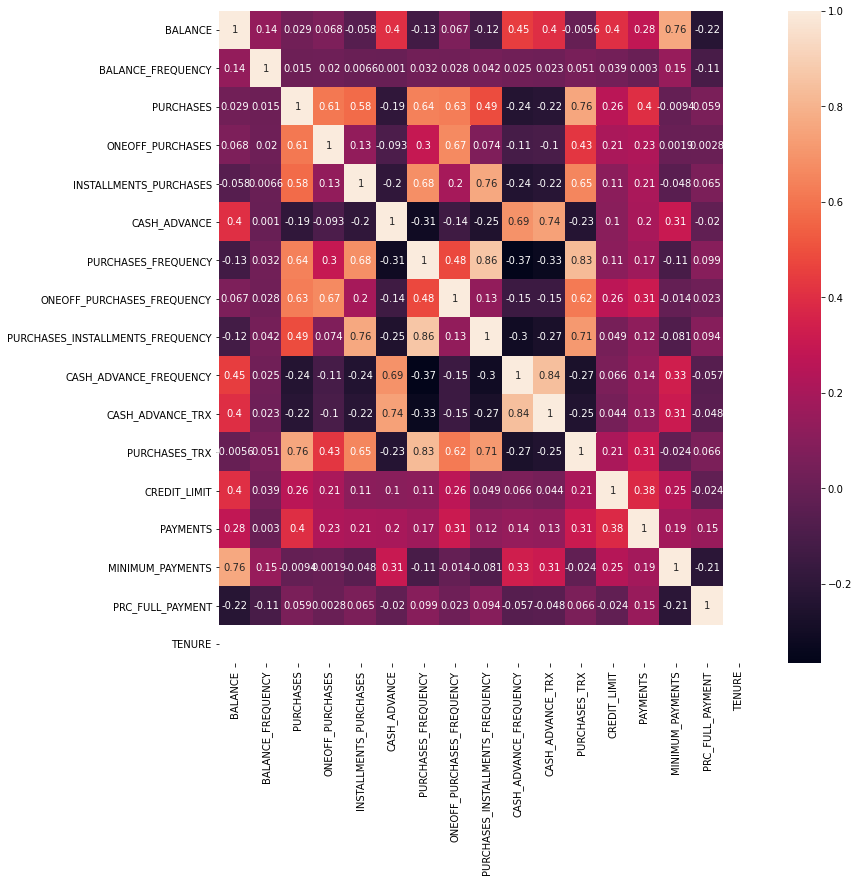

In [130]:
plt.figure(figsize=(12,12))
sns.heatmap(std_imp_data.corr(), annot=True)
plt.show()

We've got some correlated features there
We will use PCA for our dimensionality reduction.


In [131]:
from sklearn.decomposition import PCA

In [132]:
pca = PCA()

In [133]:
pca.fit(std_imp_data)

PCA()

In [134]:
pca.explained_variance_ratio_

array([0.31002374, 0.19851839, 0.09622569, 0.08613816, 0.06400657,
       0.05669263, 0.04211734, 0.0351093 , 0.02599701, 0.02046409,
       0.01740411, 0.01348626, 0.0126962 , 0.00922206, 0.00843223,
       0.00346622, 0.        ])

In [135]:
# reduced 17 features to 2 components
pca = PCA(n_components = 2)

In [136]:
pca.fit(std_imp_data)

PCA(n_components=2)

## PCA Ruesults

In [137]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = std_imp_data.columns.values,
                           index = ['Component 1', 'Component 2'])
df_pca_comp

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Component 1,-0.098116,0.005998,0.362918,0.219387,0.324340,-0.222113,0.396065,0.271707,0.339051,-0.252089,-0.243311,0.393456,0.081390,0.117007,-0.094643,0.059073,0.0
Component 2,0.438234,0.079545,0.188012,0.180627,0.063501,0.333780,0.042450,0.194407,0.006997,0.336974,0.333205,0.149558,0.297852,0.322852,0.366205,-0.067541,-0.0


([<matplotlib.axis.YTick at 0x22881f40100>,
 [Text(0, 0, 'Component 1'), Text(0, 1, 'Component 2')])

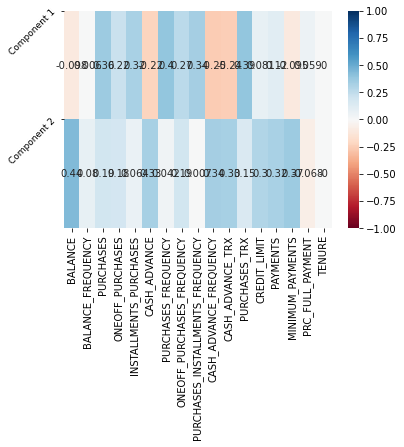

In [150]:
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, ], 
           ['Component 1', 'Component 2'],
           rotation = 45,
           fontsize = 9)

In [138]:
pca.transform(std_imp_data)
scores_pca = pca.transform(std_imp_data)

## Model Training

## Choosing the Appropriate Number of Clusters

Using the elbow method to find the optimal number of clusters

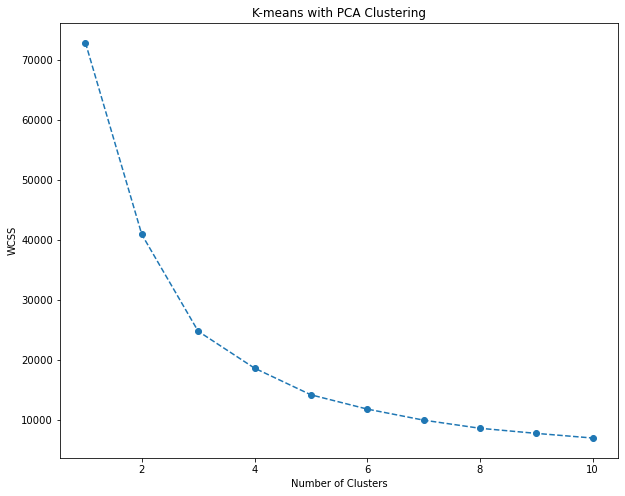

In [139]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', 
                        random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()


In [140]:
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++',
                    random_state = 42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=3, random_state=42)

In [144]:
df_segm_pca_kmeans = pd.concat([std_imp_data.reset_index(drop = True)
                                ,pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-2: ] = ['Component 1',
                                           'Component 2']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [145]:
df_segm_pca_kmeans

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Component 1,Component 2,Segment K-means PCA
0,-0.938415,-2.648163,-0.769054,-0.668008,-0.453071,-0.648957,-0.806490,-0.744535,-0.707313,-0.747150,-0.681634,-0.780853,-1.058772,-0.990200,-0.849651,-0.449541,0.0,-1.215016,-2.827960,1
1,1.544889,-1.140713,-0.910890,-0.668008,-0.787709,0.880535,-1.221758,-0.744535,-0.916995,1.029213,0.865275,-0.966433,0.877124,2.904565,1.216882,2.720181,0.0,-2.477185,2.286723,0
2,0.989314,0.366737,0.238620,1.571492,-0.787709,-0.648957,1.269843,2.115073,-0.916995,-0.747150,-0.681634,0.147050,1.038449,-0.570632,0.230934,-0.449541,0.0,1.373260,0.766591,2
3,0.338573,0.065247,1.317747,0.229675,-0.787709,-0.354281,-1.014125,-0.377920,-0.916995,-0.155031,-0.294907,-0.873643,1.038449,-1.191668,1.304805,-0.449541,0.0,-0.934117,0.303187,0
4,-0.328254,0.366737,-0.887102,-0.621664,-0.787709,-0.648957,-1.014125,-0.377920,-0.916995,-0.747150,-0.681634,-0.873643,-0.994242,-0.514457,-0.616417,-0.449541,0.0,-1.449395,-2.050479,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.948160,0.366737,-0.478068,-0.668008,0.233462,-0.648957,1.269843,-0.744535,1.179833,-0.747150,-0.681634,-0.409691,-1.058772,-0.866613,-1.050412,-0.211812,0.0,0.788039,-2.386925,1
8946,-0.955473,0.366737,-0.464865,-0.668008,0.264611,-0.648957,1.269843,-0.744535,1.179833,-0.747150,-0.681634,-0.409691,-1.058772,-0.916264,0.404089,-0.449541,0.0,0.646139,-1.852996,1
8947,-0.952162,-2.396930,-0.696204,-0.668008,-0.281192,-0.648957,0.854576,-0.744535,0.760469,-0.747150,-0.681634,-0.502482,-1.058772,-1.110532,-0.976128,3.116400,0.0,0.343636,-2.992987,1
8948,-0.959970,-2.396930,-0.910890,-0.668008,-0.787709,-0.596607,-1.221758,-0.744535,-0.916995,0.437094,0.091821,-0.966433,-1.220097,-1.139205,-1.035195,3.116400,0.0,-1.980695,-2.642891,1


In [155]:
df_segm_pca_kmeans_freq=df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Component 1,Component 2
Segment K-means PCA,,,,,,,,,,,,,,,,,,,
0,0.692351,0.038866,-0.680928,-0.394005,-0.657447,0.976827,-0.902809,-0.485296,-0.756242,1.069609,1.020909,-0.760880,0.115759,0.127919,0.585469,-0.154793,0.0,-2.434868,1.141090
1,-0.607774,-0.109606,-0.347012,-0.233727,-0.144573,-0.523012,-0.052237,-0.321878,-0.021945,-0.554352,-0.530042,-0.316271,-0.417588,-0.556297,-0.488846,0.063051,0.0,-0.069363,-1.529197
2,0.185053,0.121584,1.209654,0.748457,0.887370,-0.231620,1.003049,0.971952,0.808079,-0.280631,-0.266484,1.246387,0.496373,0.688220,0.119507,0.065911,0.0,2.599864,1.082015


In [147]:
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','BALANCE']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()

df_segm_pca_kmeans_freq

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Component 1,Component 2,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,,,,,,,,,,
0,0.692351,0.038866,-0.680928,-0.394005,-0.657447,0.976827,-0.902809,-0.485296,-0.756242,1.069609,...,-0.760880,0.115759,0.127919,0.585469,-0.154793,0.0,-2.434868,1.141090,2624,0.293184
1,-0.607774,-0.109606,-0.347012,-0.233727,-0.144573,-0.523012,-0.052237,-0.321878,-0.021945,-0.554352,...,-0.316271,-0.417588,-0.556297,-0.488846,0.063051,0.0,-0.069363,-1.529197,3768,0.421006
2,0.185053,0.121584,1.209654,0.748457,0.887370,-0.231620,1.003049,0.971952,0.808079,-0.280631,...,1.246387,0.496373,0.688220,0.119507,0.065911,0.0,2.599864,1.082015,2558,0.285810


In [151]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'cluster 0', 
                                                          1:'cluster 1',
                                                          2:'cluster 2', 
                                                          })

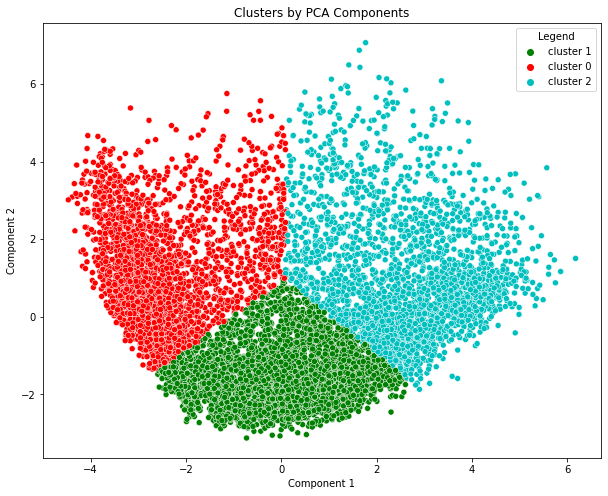

In [153]:
x_axis = df_segm_pca_kmeans['Component 1']
y_axis = df_segm_pca_kmeans['Component 2']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c'])
plt.title('Clusters by PCA Components')
plt.show()